# Creating note alignments from sequential alignment information

Dynamic Time Warping and related sequence alignment algorithms return a path between two sequences or time series. Note alignment of two polyphonic parts is categorically different from a time series alignment. To get to a note alignment, we need to figure out what notes are played at a specific time in the piano roll. Sometimes this information might be imprecise so we need to relax the search for notes at some piano roll time to find all relevant notes.

In [27]:
import partitura as pt
import os
import matplotlib.pyplot as plt
import numpy as np

In [28]:
path_to_musicxml = os.path.join("..","example_data","Chopin_op10_no3.musicxml")
part = pt.load_musicxml(path_to_musicxml)

In [29]:
piano_roll, idx = pt.utils.music.compute_pianoroll(part, return_idxs = True)

In [30]:
# pitch, onset, offset
idx

array([[ 59,   0,   4],
       [ 64,   4,   8],
       [ 56,   4,   6],
       ...,
       [ 52, 324, 332],
       [ 68, 324, 325],
       [ 66, 324, 325]])

In [31]:
# idx correspond to notes in note_array
part.note_array.shape

(486,)

In [32]:
# let's import a MIDI file for testing
path_to_midi = os.path.join("..","example_data","Chopin_op10_no3_p01.mid")
ppart = pt.load_performance_midi(path_to_midi)
ppiano_roll, pidx = pt.utils.music.compute_pianoroll(ppart, return_idxs = True)

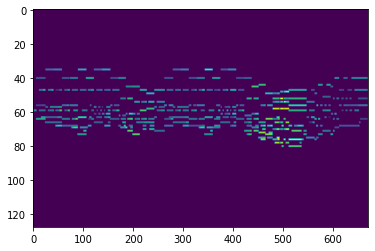

In [33]:
%matplotlib inline
plt.imshow(ppiano_roll.todense(), aspect = "auto")

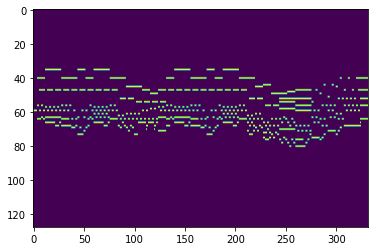

In [34]:
plt.imshow(piano_roll.todense(), aspect = "auto")

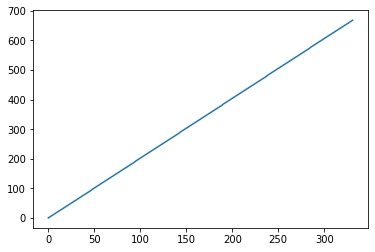

In [38]:
# invent a linear alignment for testing

alignment_times_xml = np.arange(piano_roll.todense().shape[1])
alignment_times_mid = np.floor(np.arange(piano_roll.todense().shape[1])*ppiano_roll.todense().shape[1]/piano_roll.todense().shape[1])

linear_alignment = np.column_stack([alignment_times_xml, alignment_times_mid])
plt.plot(alignment_times_xml,alignment_times_mid)

In [36]:
def greedy_note_alignment(alignment, idx1, idx2, note_array1, note_array2):
    alignment_list = []
    for note1, coord1 in zip(note_array1, idx1):
        note1_id = note1["id"]
        pitch1, x1, y1 = coord1
        for note2, coord2 in zip(note_array2, idx2):
            note2_id = note2["id"]
            pitch2, x2, y2 = coord2
            
            
            if aligment[]

(128, 332)